In [1]:
from __future__ import division, print_function, absolute_import
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from da import DenoisingAutoencoder
import math
import Image
import sys
from tensorflow.python.ops import control_flow_ops
sys.path.append('/home/ajss/notebooks/deep-learning-projects/')
from utils import tile_raster_images
import IPython.display

%matplotlib inline


In [2]:
def next_batch(index,data,labels,batch_size=10):
    """Return the next `batch_size` examples from this data set."""
    total = data.shape[0]
    end = index + batch_size
    max_end =  max(0, index + batch_size - total)
    retData =  np.concatenate((data[index:end],data[:max_end]), axis=0)
    retlabel =  np.concatenate((labels[index:end],labels[:max_end]), axis=0)
    return retData,retlabel
def plot_gallery(title, images, n_col, n_row,image_shape = (28, 28)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()   
    
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# read training data from CSV file 
dataTrain = pd.read_csv('./kaggle-mnist/train.csv')
images = dataTrain.iloc[:,1:].values
images = images.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)

labels_flat = dataTrain[[0]].values.ravel()
labels_count = np.unique(labels_flat).shape[0]
# labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels_flat #dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print(images.shape)
print(labels.shape)
# for i in range(4):
#     batch_xs, batch_ys = next_batch(i*10, images,labels)
#     plot_gallery('Base test Encoded_Decoded MNIST',batch_xs[:3],3,1)


(42000, 784)
(42000,)


In [3]:
# # read test data from CSV file 
# datatest = pd.read_csv('./kaggle-mnist/test.csv')
# imagestest = datatest.iloc[:,:].values
# imagestest = imagestest.astype(np.float)
# imagestest = np.multiply(imagestest, 1.0 / 255.0)


DenoisingAutoencoder
---------

In [4]:

flags = tf.app.flags
FLAGS = flags.FLAGS
# flags.DEFINE_string('data_dir', '/home/ajsss/data_deep/', 'Directory for storing data')


DenoisingAutoencoder-ONE LAYER ORIGINAL
-------

In [6]:

# # First dA
da1 = DenoisingAutoencoder(784, 1000, ['daw1', 'davb1', 'dahb1'],0.3)
epoch = 10
batch_size =30
interactions = int(math.floor(images.shape[0]/batch_size))
for i in tqdm(range(epoch)):
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
        cost = da1.partial_fit(batch_xs)
    print(da1.compute_cost(images))
da1.save_weights('./data-models/da1.chp')



 10%|█         | 1/10 [00:08<01:14,  8.23s/it]

0.228957


 20%|██        | 2/10 [00:16<01:05,  8.18s/it]

0.205367


 30%|███       | 3/10 [00:24<00:56,  8.12s/it]

0.188588


 40%|████      | 4/10 [00:32<00:48,  8.10s/it]

0.176598


 50%|█████     | 5/10 [00:40<00:40,  8.07s/it]

0.16718


 60%|██████    | 6/10 [00:48<00:32,  8.06s/it]

0.159352


 70%|███████   | 7/10 [00:56<00:24,  8.04s/it]

0.15264


 80%|████████  | 8/10 [01:04<00:16,  8.03s/it]

0.146768


 90%|█████████ | 9/10 [01:12<00:08,  8.02s/it]

0.141561


100%|██████████| 10/10 [01:20<00:00,  8.02s/it]

0.136899


In [7]:
da1.restore_weights('./data-models/da1.chp')

batch_xs.T
(784, 30)


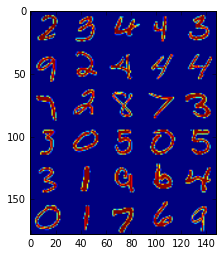

In [8]:
plt.figure()
print('batch_xs.T')
print(np.transpose(batch_xs).shape)
imagex = Image.fromarray(tile_raster_images(batch_xs,
                                           img_shape=(28, 28),
                                           tile_shape=(6, 5),
                                           tile_spacing=(2, 2)))
#         imagex.show()
plt.imshow(imagex)

(30, 784)
xk1.T


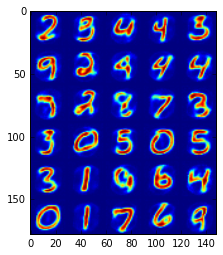

In [10]:

image_reconstruct =  da1.reconstruct(batch_xs)
print(image_reconstruct.shape)
plt.figure()
print('xk1.T')
imagexk = Image.fromarray(tile_raster_images(image_reconstruct,
                                           img_shape=(28, 28),
                                           tile_shape=(6, 5),
                                           tile_spacing=(2, 2)))
#         imagexk.show()
plt.imshow(imagexk)

W.T
(1000, 784)


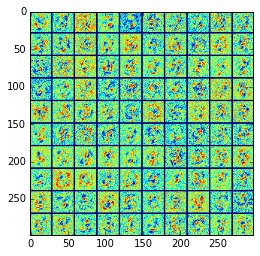

In [12]:
print('W.T')
plt.figure()
print(da1.return_hidden_weight_as_np().T.shape)
image = Image.fromarray(tile_raster_images(da1.return_hidden_weight_as_np().T,
                                           img_shape=(28, 28),
                                           tile_shape=(10, 10),
                                           tile_spacing=(2, 2)))
plt.imshow(image)